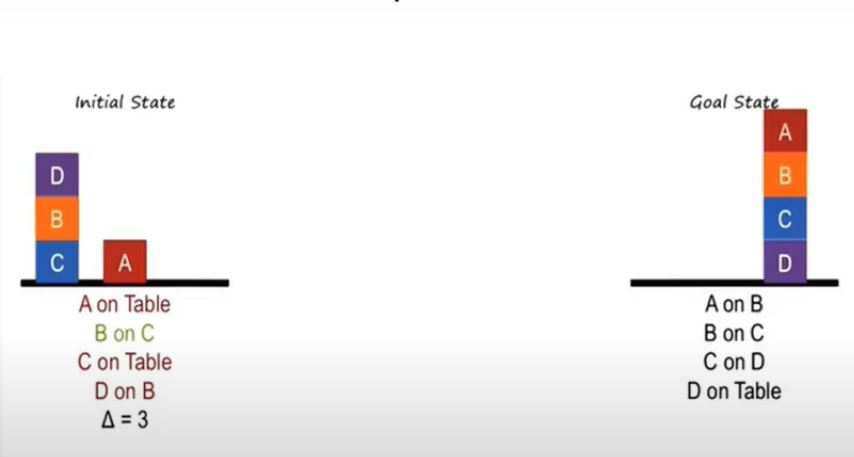

In [1]:
#States are defined by what blocks lie in each position on the table.
#Each position contains a list of blocks that lie there, ordered from bottom to top "Last element is the block on top".
class puzzle:
    def __init__(self,p1,p2,p3):
        self.p1 = p1
        self.p2 = p2
        self.p3 = p3
        self.next = [] #Store possible next moves.
        self.history = [] #Store previous moves.
        
    def __str__(self):
        return f"Position1:{self.p1}\nPosition2:{self.p2}\nPosition3:{self.p3}"
    
    def __eq__(self,other):
        return True if self.p1 == other.p1 and self.p2 == other.p2 and self.p3 == other.p3 else False
    
    def __ne__(self,other):
        return False if self.p1 == other.p1 and self.p2 == other.p2 and self.p3 == other.p3 else True
    
    def compare(self,other):
        if self.p3 == other.p3:
            return 0
        else:
            delta = 0
            for block in other.p3:
                if block in self.p3:
                    if self.p3.index(block) != other.p3.index(block): delta += 1
                else:
                    delta +=1
            return delta

In [2]:
#Initial state:
initial = puzzle(p1=["C","B","D"],
                 p2=["A"],
                 p3=[])

initial.history.append(initial)

In [3]:
#Goal state:
goal = puzzle(p1=[],
              p2=[],
              p3=["D","C","B","A"])

#Sub goal state:
sub_goal = puzzle(p1=[],
                  p2=["A","B"],
                  p3=["D","C"])


In [4]:
#Testing compare function
print(initial.compare(goal))
print(initial.compare(sub_goal))

4
2


In [5]:
def next_moves(state):
    positions = [state.p1.copy(), state.p2.copy(), state.p3.copy()]
    
    for i in range(3):
        if positions[i]:
            #If this position is not empty, move a block from it to another position:
            for j in range(3):
                if i != j:
                    next_move = generate_move(state,i,j)
                    #If this move is new:
                    if next_move not in state.next:
                        if next_move not in state.history:
                            #Add all previous moves to the history of the new move
                            next_move.history = state.history + [next_move]
                            #Add the new move to the list of possible moves of the corrent state
                            state.next.append(next_move)

In [6]:
def generate_move(state,i,j):
    temp = [state.p1.copy(), state.p2.copy(), state.p3.copy()]
    temp[j].append(temp[i].pop())
    return puzzle(*temp)

In [7]:
#Testing next_moves function:
print("Current state:",initial,sep = "\n\n")
next_moves(initial)
print("\nNext moves:",*initial.next ,sep="\n\n")

Current state:

Position1:['C', 'B', 'D']
Position2:['A']
Position3:[]

Next moves:

Position1:['C', 'B']
Position2:['A', 'D']
Position3:[]

Position1:['C', 'B']
Position2:['A']
Position3:['D']

Position1:['C', 'B', 'D', 'A']
Position2:[]
Position3:[]

Position1:['C', 'B', 'D']
Position2:[]
Position3:['A']


In [8]:
def solve(start,goal):
    if start == goal: return start #Recursion Condition
    
    next_moves(start)
    #Find a move that reduces the error:
    for move in start.next:
        if move.compare(goal) < start.compare(goal):
            return solve(move,goal)
        
    #If no possible moves reduce the error: try all moves that don't increase the error:
    for move in start.next:
        if move.compare(goal) == start.compare(goal):
             return solve(move,goal)
    #If there are no more possible moves:
    print("No possible solutions")        
    

In [10]:
solution = solve(initial,goal)
print(*solution.history,sep="\n\n")

Position1:['C', 'B', 'D']
Position2:['A']
Position3:[]

Position1:['C', 'B']
Position2:['A']
Position3:['D']

Position1:['C']
Position2:['A', 'B']
Position3:['D']

Position1:[]
Position2:['A', 'B']
Position3:['D', 'C']

Position1:[]
Position2:['A']
Position3:['D', 'C', 'B']

Position1:[]
Position2:[]
Position3:['D', 'C', 'B', 'A']
